# Preliminary Analysis

## import libraries

In [1]:
# !pip install pandas
import pandas as pd
import json
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## read CSVs to dataframes

In [2]:
# news_media_basic_data

news_media_basic_data = pd.read_csv (r'/Users/katherina/data_science_tweets_neutrality/news_media_twitter_username.csv')
news_media_basic_data.head()

,news_media,twitter_username,us_or_foreign,general_or_political,political_spectrum
0,ABC News,ABC,US,General,Left
1,ABC News,ABCNewsLive,US,General,Left
2,ABC News,ABCPolitics,US,Political,Left
3,BBC News,BBCBreaking,Foreign,General,Middle
4,BBC News,BBCNews,Foreign,General,Middle


In [3]:
# twitter_user_details_data

twitter_user_details_data = pd.read_csv (r'/Users/katherina/data_science_tweets_neutrality/twitter_user_details.csv')
twitter_user_details_data.head()

,user_id,user_name,user_username,user_created_at,user_location,user_protected,user_followers_count,user_following_count,user_tweet_count,user_listed_count,user_verified
0,28785486,ABC News,ABC,2009-04-04 12:40:32+00:00,New York City / Worldwide,False,17644680,486,393230,66112,True
1,384438102,ABC News Live,ABCNewsLive,2011-10-03 17:47:38+00:00,NaN,False,96020,242,36785,2240,True
2,16815644,ABC News Politics,ABCPolitics,2008-10-16 22:43:16+00:00,"Washington, DC",False,1079807,473,192830,8499,True
3,5402612,BBC Breaking News,BBCBreaking,2007-04-22 14:42:37+00:00,"London, UK",False,50727938,3,38184,147742,True
4,612473,BBC News (UK),BBCNews,2007-01-08 08:05:57+00:00,London,False,14276300,93,499300,49372,True


In [4]:
# twitter_combined_tweet_data from 2022/07/01 to 2022/08/31

twitter_combined_tweet_labelled_cleaned_data = pd.read_csv (r'/Users/katherina/data_science_tweets_neutrality/twitter_combined_tweet_labelled_cleaned_data.csv')
twitter_combined_tweet_labelled_cleaned_data.head()

,tweet_id,tweet_text,tweet_author_id,tweet_context_annotations,tweet_created_at,tweet_entities,tweet_in_reply_to_user_id,tweet_lang,tweet_retweet_count,tweet_reply_count,...,tweet_referenced_tweets,tweet_type,tweet_topic_label_us_political_news,contains_abortion_keyword,contains_gun_control_keyword,contains_gay_marriage_keyword,contains_climate_change_keyword,contains_gender_identity_keyword,contains_inflation_keyword,cleaned_tweet_text
0,1543217089145716737,"Pentagon data shows a simple, troubling trend:...",28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 12:56:40+00:00,"{'urls': [{'start': 154, 'end': 177, 'url': 'h...",NaN,en,185,288,...,NaN,tweet,False,False,False,False,False,False,False,"Pentagon data shows a simple, troubling trend:..."
1,1543211077772759042,Rescue services in Hong Kong say an industrial...,28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 12:32:47+00:00,"{'urls': [{'start': 162, 'end': 185, 'url': 'h...",NaN,en,22,8,...,NaN,tweet,False,False,False,False,False,False,False,Rescue services in Hong Kong say an industrial...
2,1543205864881983489,In the wake of the Supreme Court’s ruling on R...,28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 12:12:04+00:00,"{'urls': [{'start': 239, 'end': 262, 'url': 'h...",NaN,en,22,20,...,NaN,tweet,False,True,False,False,False,False,False,In the wake of the Supreme Court’s ruling on R...
3,1543200664024760321,If legislation banning or restricting abortion...,28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 11:51:24+00:00,"{'urls': [{'start': 166, 'end': 189, 'url': 'h...",NaN,en,49,36,...,NaN,tweet,False,True,False,False,False,False,False,If legislation banning or restricting abortion...
4,1543193997329457157,“We imagined this thing being a fairytale and ...,28785486,"[{'domain': {'id': '10', 'name': 'Person', 'de...",2022-07-02 11:24:54+00:00,"{'urls': [{'start': 172, 'end': 195, 'url': 'h...",NaN,en,11,8,...,NaN,tweet,False,False,False,False,False,False,False,“We imagined this thing being a fairytale and ...


In [5]:
twitter_combined_tweet_labelled_cleaned_data.groupby(['tweet_id']).filter(lambda x: x['tweet_author_id'].count()>1)

,tweet_id,tweet_text,tweet_author_id,tweet_context_annotations,tweet_created_at,tweet_entities,tweet_in_reply_to_user_id,tweet_lang,tweet_retweet_count,tweet_reply_count,...,tweet_referenced_tweets,tweet_type,tweet_topic_label_us_political_news,contains_abortion_keyword,contains_gun_control_keyword,contains_gay_marriage_keyword,contains_climate_change_keyword,contains_gender_identity_keyword,contains_inflation_keyword,cleaned_tweet_text


In [6]:
# tweet_sentiments_score_data

twitter_tweet_sentiments_score_data = pd.read_csv (r'/Users/katherina/data_science_tweets_neutrality/twitter_tweet_sentiments_score_data.csv')
twitter_tweet_sentiments_score_data.head()

,tweet_id,scores_compound,scores_positive,scores_negative,scores_neutral
0,1543217089145716737,-0.7096,0.044,0.210,0.746
1,1543211077772759042,0.5719,0.175,0.067,0.758
2,1543205864881983489,0.3892,0.107,0.052,0.841
3,1543200664024760321,-0.5719,0.000,0.176,0.824
4,1543193997329457157,0.0000,0.000,0.000,1.000


## processing the data

### combined dataframes

In [7]:
# combine twitter_combined_tweet_data and tweet_sentiments_score
combined_tweet_sentiments_score_df = pd.merge(twitter_combined_tweet_labelled_cleaned_data, twitter_tweet_sentiments_score_data, left_on='tweet_id', right_on='tweet_id', how='left',validate='one_to_one')

# check for duplicates for combined_news_media_tweets_sentiments_score_df
combined_tweet_sentiments_score_df[combined_tweet_sentiments_score_df.duplicated(['tweet_id'], keep=False)]

,tweet_id,tweet_text,tweet_author_id,tweet_context_annotations,tweet_created_at,tweet_entities,tweet_in_reply_to_user_id,tweet_lang,tweet_retweet_count,tweet_reply_count,...,contains_gun_control_keyword,contains_gay_marriage_keyword,contains_climate_change_keyword,contains_gender_identity_keyword,contains_inflation_keyword,cleaned_tweet_text,scores_compound,scores_positive,scores_negative,scores_neutral


In [8]:
twitter_user_details_data.groupby(['user_verified']).count()

,user_id,user_name,user_username,user_created_at,user_location,user_protected,user_followers_count,user_following_count,user_tweet_count,user_listed_count
user_verified,,,,,,,,,,
False,3,3,3,3,2,3,3,3,3,3
True,60,60,60,60,46,60,60,60,60,60


In [9]:
twitter_user_details_data = twitter_user_details_data[twitter_user_details_data['user_verified']==True]
twitter_user_details_data.shape

(60, 11)

In [10]:
twitter_user_details_data.groupby(['user_protected']).count()

,user_id,user_name,user_username,user_created_at,user_location,user_followers_count,user_following_count,user_tweet_count,user_listed_count,user_verified
user_protected,,,,,,,,,,
False,60,60,60,60,46,60,60,60,60,60


In [11]:
# combine combined_tweet_sentiments_score_df and twitter_user_details_data

combined_tweet_sentiments_score_user_df = pd.merge(combined_tweet_sentiments_score_df, twitter_user_details_data, left_on='tweet_author_id', right_on='user_id', how='left',validate='many_to_one')

# combined_news_media_tweets_df = combined_news_media_tweets_df[(~combined_news_media_tweets_df.duplicated(subset=['tweet_id'])) | (combined_news_media_tweets_df['tweet_id'].isnull())]

# check for duplicates for combined_tweet_sentiments_score_user_df
combined_tweet_sentiments_score_user_df[combined_tweet_sentiments_score_user_df.duplicated(['tweet_id'], keep=False)]

,tweet_id,tweet_text,tweet_author_id,tweet_context_annotations,tweet_created_at,tweet_entities,tweet_in_reply_to_user_id,tweet_lang,tweet_retweet_count,tweet_reply_count,...,user_name,user_username,user_created_at,user_location,user_protected,user_followers_count,user_following_count,user_tweet_count,user_listed_count,user_verified


In [12]:
# combine combined_news_media_tweets_sentiments_score_df and news_media_basic_data
combined_news_media_tweets_sentiments_score_news_media_df = pd.merge(combined_tweet_sentiments_score_user_df, news_media_basic_data, left_on='user_username', right_on='twitter_username', how='inner',validate='many_to_one')

# check for duplicates for ccombined_news_media_tweets_sentiments_score_news_media_df
combined_news_media_tweets_sentiments_score_news_media_df[combined_news_media_tweets_sentiments_score_news_media_df.duplicated(['tweet_id'], keep=False)]

,tweet_id,tweet_text,tweet_author_id,tweet_context_annotations,tweet_created_at,tweet_entities,tweet_in_reply_to_user_id,tweet_lang,tweet_retweet_count,tweet_reply_count,...,user_followers_count,user_following_count,user_tweet_count,user_listed_count,user_verified,news_media,twitter_username,us_or_foreign,general_or_political,political_spectrum


In [13]:
# add column tweet_created_at_date

combined_news_media_tweets_sentiments_score_news_media_df['tweet_created_at_date'] = pd.to_datetime(combined_news_media_tweets_sentiments_score_news_media_df['tweet_created_at']).apply(lambda x: x.date())
combined_news_media_tweets_sentiments_score_news_media_df.head()

,tweet_id,tweet_text,tweet_author_id,tweet_context_annotations,tweet_created_at,tweet_entities,tweet_in_reply_to_user_id,tweet_lang,tweet_retweet_count,tweet_reply_count,...,user_following_count,user_tweet_count,user_listed_count,user_verified,news_media,twitter_username,us_or_foreign,general_or_political,political_spectrum,tweet_created_at_date
0,1543217089145716737,"Pentagon data shows a simple, troubling trend:...",28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 12:56:40+00:00,"{'urls': [{'start': 154, 'end': 177, 'url': 'h...",NaN,en,185,288,...,486.0,393230.0,66112.0,True,ABC News,ABC,US,General,Left,2022-07-02
1,1543211077772759042,Rescue services in Hong Kong say an industrial...,28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 12:32:47+00:00,"{'urls': [{'start': 162, 'end': 185, 'url': 'h...",NaN,en,22,8,...,486.0,393230.0,66112.0,True,ABC News,ABC,US,General,Left,2022-07-02
2,1543205864881983489,In the wake of the Supreme Court’s ruling on R...,28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 12:12:04+00:00,"{'urls': [{'start': 239, 'end': 262, 'url': 'h...",NaN,en,22,20,...,486.0,393230.0,66112.0,True,ABC News,ABC,US,General,Left,2022-07-02
3,1543200664024760321,If legislation banning or restricting abortion...,28785486,"[{'domain': {'id': '45', 'name': 'Brand Vertic...",2022-07-02 11:51:24+00:00,"{'urls': [{'start': 166, 'end': 189, 'url': 'h...",NaN,en,49,36,...,486.0,393230.0,66112.0,True,ABC News,ABC,US,General,Left,2022-07-02
4,1543193997329457157,“We imagined this thing being a fairytale and ...,28785486,"[{'domain': {'id': '10', 'name': 'Person', 'de...",2022-07-02 11:24:54+00:00,"{'urls': [{'start': 172, 'end': 195, 'url': 'h...",NaN,en,11,8,...,486.0,393230.0,66112.0,True,ABC News,ABC,US,General,Left,2022-07-02


In [14]:
twitter_combined_tweet_labelled_cleaned_data.shape

(209001, 22)

In [15]:
combined_tweet_sentiments_score_df.shape

(209001, 26)

In [16]:
combined_news_media_tweets_sentiments_score_news_media_df.shape

(206107, 43)

In [17]:
combined_news_media_tweets_sentiments_score_news_media_df.isnull().sum()

tweet_id                                    0
tweet_text                                  0
tweet_author_id                             0
tweet_context_annotations                   0
tweet_created_at                            0
tweet_entities                            215
tweet_in_reply_to_user_id              200316
tweet_lang                                  0
tweet_retweet_count                         0
tweet_reply_count                           0
tweet_like_count                            0
tweet_quote_count                           0
tweet_referenced_tweets                184227
tweet_type                                  0
tweet_topic_label_us_political_news         0
contains_abortion_keyword                   0
contains_gun_control_keyword                0
contains_gay_marriage_keyword               0
contains_climate_change_keyword             0
contains_gender_identity_keyword            0
contains_inflation_keyword                  0
cleaned_tweet_text                

In [18]:
combined_data = combined_news_media_tweets_sentiments_score_news_media_df

In [19]:
combined_data['news_media'].nunique()

39

In [20]:
combined_data['user_username'].nunique()

59

In [21]:
combined_data.groupby(['political_spectrum'])['user_username'].nunique()

political_spectrum
Left      37
Middle    12
Right     10
Name: user_username, dtype: int64

In [22]:
combined_data.groupby(['tweet_type'])['tweet_type'].count()

tweet_type
reply        5791
retweet     16122
tweet      184194
Name: tweet_type, dtype: int64

## analyse combined data

In [23]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 62)

combined_news_media_tweets_per_day_piv = combined_data.pivot_table(index=['tweet_created_at_date'], columns='user_name', 
values='tweet_id', aggfunc='nunique', fill_value=0)
combined_news_media_tweets_per_day_piv

user_name,ABC News,ABC News Live,ABC News Politics,BBC Breaking News,BBC News (UK),BBC News (World),BBC North America,Bloomberg,Bloomberg Politics,CBS News,CBS News Politics,CBS News Poll,CNN,CNN Breaking News,CNN Politics,Daily Mail US,Daily Wire,Democracy Now!,Forbes,Fox News,Fox News Politics,Guardian news,Guardian politics,HuffPost,HuffPost Politics,MSNBC,Mother Jones,NBC News,NBC Politics,NPR,NPR Politics,NYT Politics,National Review News Wire,Newsweek,POLITICO,POLITICO New York,Reuters,Sky News,Slate,TIME,The Atlantic,The Daily Beast,The Economist,The Economist US,The Epoch Times,The Federalist,The Guardian,The Hill,The Intercept,The New York Times,The New Yorker,The Wall Street Journal,The Washington Post,The Washington Times,TheBlaze,USA TODAY,USA TODAY Politics,Vox,Washington Examiner
tweet_created_at_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-01,76,19,3,2,90,48,5,0,0,0,3,1,79,2,26,0,113,33,0,0,0,0,9,99,27,59,30,78,24,52,28,18,4,47,24,0,0,0,0,60,43,0,0,18,0,25,0,0,20,0,43,0,0,0,49,77,27,24,0
2022-07-02,63,3,2,0,56,28,2,0,0,0,0,0,62,3,9,0,43,14,0,0,0,0,2,35,12,44,14,54,0,52,9,17,0,14,6,0,0,0,0,54,24,0,0,17,0,3,0,0,10,0,41,27,0,0,18,36,8,16,0
2022-07-03,70,0,36,2,70,25,1,0,0,0,1,0,48,0,0,0,48,5,0,0,0,0,7,29,13,26,20,46,0,30,1,6,0,16,5,0,0,0,0,53,15,0,0,16,0,6,0,0,9,0,34,86,0,0,5,44,6,6,0
2022-07-04,78,37,21,5,100,60,3,0,0,0,0,0,74,7,1,0,58,4,0,0,0,0,8,50,22,34,22,62,1,40,3,0,0,43,5,0,0,0,0,51,27,0,0,12,0,2,0,0,9,0,47,94,0,0,21,38,13,5,0
2022-07-05,80,17,41,6,114,50,7,0,121,0,0,0,62,9,9,0,101,21,0,0,0,0,16,58,18,52,27,83,5,48,23,16,5,98,24,0,0,0,0,65,50,0,0,14,0,18,0,0,7,0,37,96,0,0,41,78,15,4,0
2022-07-06,93,20,44,4,125,42,4,0,158,0,2,0,90,6,24,0,123,25,0,0,0,0,12,76,21,72,35,92,10,46,25,19,5,61,23,0,0,0,0,57,45,0,0,18,0,31,0,0,12,59,35,102,0,0,63,72,18,26,0
2022-07-07,87,22,47,6,111,58,8,0,146,105,0,0,75,7,16,0,109,35,0,0,0,0,17,78,23,70,49,90,12,54,16,22,4,83,20,0,0,0,97,66,52,0,0,15,0,25,0,0,13,116,34,96,0,0,53,76,23,24,0
2022-07-08,106,14,19,5,90,48,7,0,135,128,6,0,73,9,27,0,112,34,0,0,0,0,14,78,22,83,40,110,11,55,31,20,3,72,45,0,0,0,98,69,48,0,122,14,0,29,0,0,10,107,34,96,12,0,64,78,18,18,0
2022-07-09,78,3,0,2,53,22,2,0,43,62,0,0,59,3,1,0,29,17,0,0,0,0,12,31,11,50,22,58,6,29,5,14,0,18,7,1,0,0,91,55,40,0,120,13,0,6,0,0,7,96,37,86,58,0,29,38,8,3,0


In [24]:
combined_news_media_tweets_per_day_piv_2 = combined_data.pivot_table(index=['user_name'],  
values='tweet_created_at_date', aggfunc='nunique', fill_value=0)
combined_news_media_tweets_per_day_piv_2

,tweet_created_at_date
user_name,
ABC News,62
ABC News Live,59
ABC News Politics,58
BBC Breaking News,52
BBC News (UK),62
BBC News (World),62
BBC North America,60
Bloomberg,17
Bloomberg Politics,58


### create data per user for analysis

In [25]:
# count total tweet and tweeted date per news media
analysis_df = combined_data.groupby(['user_id',
                                     'user_name',
                                     'user_followers_count',
                                     'user_following_count',
                                     'news_media',
                                     'us_or_foreign',
                                     'general_or_political',
                                     'political_spectrum',
                                    ])[['tweet_id','tweet_created_at_date']].nunique().add_prefix('count_total_').reset_index()

analysis_df.head(60)

,user_id,user_name,user_followers_count,user_following_count,news_media,us_or_foreign,general_or_political,political_spectrum,count_total_tweet_id,count_total_tweet_created_at_date
0,4.283330e+05,CNN Breaking News,63662926.0,121.0,CNN,US,General,Left,292,59
1,6.124730e+05,BBC News (UK),14276300.0,93.0,BBC News,Foreign,General,Middle,4788,62
2,7.421430e+05,BBC News (World),37774379.0,18.0,BBC News,Foreign,General,Middle,2706,62
3,7.592510e+05,CNN,59357266.0,1103.0,CNN,US,General,Left,4913,62
4,7.885240e+05,Guardian news,3802981.0,1225.0,The Guardian,Foreign,General,Left,5643,48
5,8.070950e+05,The New York Times,53885565.0,892.0,New York Times,US,General,Left,5793,57
6,1.367531e+06,Fox News,22228143.0,262.0,Fox News,US,General,Right,9018,39
7,1.652541e+06,Reuters,25471928.0,1236.0,Reuters,Foreign,General,Middle,7150,17
8,1.917731e+06,The Hill,4436643.0,305.0,The Hill,US,Political,Middle,8815,28
9,2.467791e+06,The Washington Post,19648090.0,1716.0,Washington Post,US,General,Left,6013,55


In [26]:
pivot_tweet_type = combined_data.pivot_table(index=['user_id'], columns='tweet_type', 
values='tweet_id', aggfunc='nunique', fill_value=0)

pivot_tweet_type.rename(
    columns={'reply':'count_reply',
             'retweet':'count_retweet',
             'tweet':'count_tweet'
            }
          ,inplace=True)

pivot_tweet_type.head()

tweet_type,count_reply,count_retweet,count_tweet
user_id,,,
428333.0,1,12,279
612473.0,4,433,4351
742143.0,4,130,2572
759251.0,26,27,4860
788524.0,0,0,5643


In [27]:
user_overall_avg_sentiments_score = combined_data.groupby('user_id')[['scores_compound']].mean().reset_index().rename(columns={'scores_compound': 'avg_tweet_scores'})
user_overall_avg_sentiments_score.head()

,user_id,avg_tweet_scores
0,428333.0,-0.195579
1,612473.0,-0.108851
2,742143.0,-0.163808
3,759251.0,-0.061633
4,788524.0,-0.111451


In [28]:
# count tweet and average sentiments_score for tweet contains_abortion_keyword

user_contains_abortion_keyword_tweet = combined_data[(combined_data['contains_abortion_keyword']==True) &
                                                     (combined_data['tweet_type']=='tweet')].groupby('user_id').agg({'tweet_id':'count',
                                                                                                                     'scores_compound':'mean'}).rename(columns={'tweet_id':'count_abortion_tweet',
                                                                                                                     'scores_compound':'avg_abortion_tweet_scores'})
        
user_contains_abortion_keyword_tweet.head()

# user_contains_abortion_keyword_avg_sentiments_score = combined_data[combined_data['contains_abortion_keyword']==True].groupby('user_id')[['scores_compound',
#                                                                   'scores_positive',
#                                                                   'scores_negative',
#                                                                   'scores_neutral']].mean().reset_index().rename(columns={'scores_compound': 'ct_abortion_avg_scores_compound',
#                                                                                                                           'scores_positive': 'ct_abortion_avg_scores_negative',
#                                                                                                                           'scores_negative': 'ct_abortion_avg_scores_negative',
#                                                                                                                           'scores_neutral': 'ct_abortion_avg_scores_neutral'
#                                                                                                                          })
# user_contains_abortion_keyword_avg_sentiments_score.head()

,count_abortion_tweet,avg_abortion_tweet_scores
user_id,,
428333.0,6,0.160467
612473.0,18,-0.065122
742143.0,30,-0.119000
759251.0,149,-0.047911
788524.0,56,-0.053654


In [29]:
# count tweet and average sentiments_score for tweet contains_gun_control_keyword

user_contains_gun_control_keyword_tweet = combined_data[combined_data['contains_gun_control_keyword']==True].groupby('user_id').agg({'tweet_id':'count',
                                                                                                                                                    'scores_compound':'mean'}).rename(columns={'tweet_id':'count_gun_control_tweet',
                                                                                                                                                    'scores_compound':'avg_gun_control_tweet_scores'})
        
user_contains_gun_control_keyword_tweet.head()

,count_gun_control_tweet,avg_gun_control_tweet_scores
user_id,,
428333.0,12,-0.425492
612473.0,69,-0.223404
742143.0,57,-0.342998
759251.0,177,-0.276136
788524.0,83,-0.237889


In [30]:
# count tweet and average sentiments_score for tweet contains_gay_marriage_keyword

user_contains_gay_marriage_keyword_tweet = combined_data[(combined_data['contains_gay_marriage_keyword']==True) &
                                                         (combined_data['tweet_type']=='tweet')].groupby('user_id').agg({'tweet_id':'count',
                                                                                                                         'scores_compound':'mean'}).rename(columns={'tweet_id':'count_gay_marriage_tweet',
                                                                                                                         'scores_compound':'avg_gay_marriage_tweet_scores'})
        
user_contains_gay_marriage_keyword_tweet.head()

,count_gay_marriage_tweet,avg_gay_marriage_tweet_scores
user_id,,
428333.0,1,-0.416800
612473.0,3,0.075400
742143.0,8,-0.026788
759251.0,13,0.051831
788524.0,8,0.102775


In [31]:
# count tweet and average sentiments_score for tweet contains_climate_change_keyword

user_contains_climate_change_keyword_tweet = combined_data[(combined_data['contains_climate_change_keyword']==True) &
                                                           (combined_data['tweet_type']=='tweet')].groupby('user_id').agg({'tweet_id':'count',
                                                                                                                           'scores_compound':'mean'}).rename(columns={'tweet_id':'count_climate_change_tweet',
                                                                                                                           'scores_compound':'avg_climate_change_tweet_scores'})
        
user_contains_climate_change_keyword_tweet.head()

,count_climate_change_tweet,avg_climate_change_tweet_scores
user_id,,
428333.0,13,0.026638
612473.0,130,-0.091344
742143.0,93,-0.142737
759251.0,272,-0.076054
788524.0,252,-0.131683


In [32]:
# count tweet and average sentiments_score for tweet contains_gender_identity_keyword

user_contains_gender_identity_keyword_tweet = combined_data[(combined_data['contains_gender_identity_keyword']==True) &
                                                            (combined_data['tweet_type']=='tweet')].groupby('user_id').agg({'tweet_id':'count',
                                                                                                                            'scores_compound':'mean'}).rename(columns={'tweet_id':'count_gender_identity_tweet',
                                                                                                                            'scores_compound':'avg_gender_identity_tweet_scores'})
        
user_contains_gender_identity_keyword_tweet.head()


,count_gender_identity_tweet,avg_gender_identity_tweet_scores
user_id,,
612473.0,38,-0.017637
742143.0,29,0.029766
759251.0,81,-0.106260
788524.0,29,0.073924
807095.0,111,-0.053409


In [33]:
# count tweet and average sentiments_score for tweet contains_inflation_keyword

user_contains_inflation_keyword_tweet = combined_data[(combined_data['contains_inflation_keyword']==True) &
                                                      (combined_data['tweet_type']=='tweet')].groupby('user_id').agg({'tweet_id':'count',
                                                                                                                      'scores_compound':'mean'}).rename(columns={'tweet_id':'count_inflation_tweet',
                                                                                                                      'scores_compound':'avg_inflation_tweet_scores'})
        
user_contains_inflation_keyword_tweet.head()

,count_inflation_tweet,avg_inflation_tweet_scores
user_id,,
428333.0,8,0.211425
612473.0,187,0.003875
742143.0,17,-0.013335
759251.0,93,-0.051286
788524.0,212,-0.049201


In [34]:
# combine data per users

combined_analysis_df = None

combined_analysis_df = pd.merge(analysis_df, pivot_tweet_type, left_on='user_id', right_on='user_id', how='left',validate='one_to_one')

combined_analysis_df = pd.merge(combined_analysis_df, user_overall_avg_sentiments_score, left_on='user_id', right_on='user_id', how='left',validate='one_to_one')

combined_analysis_df = pd.merge(combined_analysis_df, user_contains_abortion_keyword_tweet, left_on='user_id', right_on='user_id', how='left',validate='one_to_one')

combined_analysis_df = pd.merge(combined_analysis_df, user_contains_gun_control_keyword_tweet, left_on='user_id', right_on='user_id', how='left',validate='one_to_one')

combined_analysis_df = pd.merge(combined_analysis_df, user_contains_gay_marriage_keyword_tweet, left_on='user_id', right_on='user_id', how='left',validate='one_to_one')

combined_analysis_df = pd.merge(combined_analysis_df, user_contains_climate_change_keyword_tweet, left_on='user_id', right_on='user_id', how='left',validate='one_to_one')

combined_analysis_df = pd.merge(combined_analysis_df, user_contains_gender_identity_keyword_tweet, left_on='user_id', right_on='user_id', how='left',validate='one_to_one')

combined_analysis_df = pd.merge(combined_analysis_df, user_contains_inflation_keyword_tweet, left_on='user_id', right_on='user_id', how='left',validate='one_to_one')

combined_analysis_df = combined_analysis_df.fillna(0)

combined_analysis_df.head(60)

,user_id,user_name,user_followers_count,user_following_count,news_media,us_or_foreign,general_or_political,political_spectrum,count_total_tweet_id,count_total_tweet_created_at_date,count_reply,count_retweet,count_tweet,avg_tweet_scores,count_abortion_tweet,avg_abortion_tweet_scores,count_gun_control_tweet,avg_gun_control_tweet_scores,count_gay_marriage_tweet,avg_gay_marriage_tweet_scores,count_climate_change_tweet,avg_climate_change_tweet_scores,count_gender_identity_tweet,avg_gender_identity_tweet_scores,count_inflation_tweet,avg_inflation_tweet_scores
0,4.283330e+05,CNN Breaking News,63662926.0,121.0,CNN,US,General,Left,292,59,1,12,279,-0.195579,6.0,0.160467,12.0,-0.425492,1.0,-0.416800,13.0,0.026638,0.0,0.000000,8.0,0.211425
1,6.124730e+05,BBC News (UK),14276300.0,93.0,BBC News,Foreign,General,Middle,4788,62,4,433,4351,-0.108851,18.0,-0.065122,69.0,-0.223404,3.0,0.075400,130.0,-0.091344,38.0,-0.017637,187.0,0.003875
2,7.421430e+05,BBC News (World),37774379.0,18.0,BBC News,Foreign,General,Middle,2706,62,4,130,2572,-0.163808,30.0,-0.119000,57.0,-0.342998,8.0,-0.026788,93.0,-0.142737,29.0,0.029766,17.0,-0.013335
3,7.592510e+05,CNN,59357266.0,1103.0,CNN,US,General,Left,4913,62,26,27,4860,-0.061633,149.0,-0.047911,177.0,-0.276136,13.0,0.051831,272.0,-0.076054,81.0,-0.106260,93.0,-0.051286
4,7.885240e+05,Guardian news,3802981.0,1225.0,The Guardian,Foreign,General,Left,5643,48,0,0,5643,-0.111451,56.0,-0.053654,83.0,-0.237889,8.0,0.102775,252.0,-0.131683,29.0,0.073924,212.0,-0.049201
5,8.070950e+05,The New York Times,53885565.0,892.0,New York Times,US,General,Left,5793,57,215,831,4747,-0.071085,130.0,-0.070119,231.0,-0.307692,8.0,0.024275,344.0,0.004531,111.0,-0.053409,109.0,-0.041913
6,1.367531e+06,Fox News,22228143.0,262.0,Fox News,US,General,Right,9018,39,5,118,8895,-0.144100,127.0,-0.167269,241.0,-0.310064,5.0,-0.153280,361.0,-0.126534,164.0,-0.047310,265.0,-0.171314
7,1.652541e+06,Reuters,25471928.0,1236.0,Reuters,Foreign,General,Middle,7150,17,115,77,6958,-0.009291,58.0,-0.095534,126.0,-0.228847,0.0,0.000000,503.0,0.015143,105.0,0.153613,371.0,-0.010763
8,1.917731e+06,The Hill,4436643.0,305.0,The Hill,US,Political,Middle,8815,28,79,19,8717,-0.033995,246.0,0.022422,198.0,-0.300740,1.0,0.000000,388.0,0.027388,168.0,-0.003436,367.0,0.064149
9,2.467791e+06,The Washington Post,19648090.0,1716.0,Washington Post,US,General,Left,6013,55,801,223,4989,-0.069560,206.0,-0.083564,198.0,-0.287716,19.0,0.357921,286.0,-0.063567,96.0,-0.055941,115.0,-0.054067


In [35]:
# calculate average total tweet per day
combined_analysis_df['avg_daily_total_tweet'] = round(combined_analysis_df['count_total_tweet_id']/combined_analysis_df['count_total_tweet_created_at_date'],2)

# calculate average tweet per day
combined_analysis_df['avg_daily_tweet'] = round(combined_analysis_df['count_tweet']/combined_analysis_df['count_total_tweet_created_at_date'],2)

# calculate average retweet per day
combined_analysis_df['avg_daily_retweet'] = round(combined_analysis_df['count_retweet']/combined_analysis_df['count_total_tweet_created_at_date'],2)

# calculate average reply per day
combined_analysis_df['avg_daily_reply'] = round(combined_analysis_df['count_reply']/combined_analysis_df['count_total_tweet_created_at_date'],2)

combined_analysis_df.head()

,user_id,user_name,user_followers_count,user_following_count,news_media,us_or_foreign,general_or_political,political_spectrum,count_total_tweet_id,count_total_tweet_created_at_date,count_reply,count_retweet,count_tweet,avg_tweet_scores,count_abortion_tweet,avg_abortion_tweet_scores,count_gun_control_tweet,avg_gun_control_tweet_scores,count_gay_marriage_tweet,avg_gay_marriage_tweet_scores,count_climate_change_tweet,avg_climate_change_tweet_scores,count_gender_identity_tweet,avg_gender_identity_tweet_scores,count_inflation_tweet,avg_inflation_tweet_scores,avg_daily_total_tweet,avg_daily_tweet,avg_daily_retweet,avg_daily_reply
0,428333.0,CNN Breaking News,63662926.0,121.0,CNN,US,General,Left,292,59,1,12,279,-0.195579,6.0,0.160467,12.0,-0.425492,1.0,-0.416800,13.0,0.026638,0.0,0.000000,8.0,0.211425,4.95,4.73,0.20,0.02
1,612473.0,BBC News (UK),14276300.0,93.0,BBC News,Foreign,General,Middle,4788,62,4,433,4351,-0.108851,18.0,-0.065122,69.0,-0.223404,3.0,0.075400,130.0,-0.091344,38.0,-0.017637,187.0,0.003875,77.23,70.18,6.98,0.06
2,742143.0,BBC News (World),37774379.0,18.0,BBC News,Foreign,General,Middle,2706,62,4,130,2572,-0.163808,30.0,-0.119000,57.0,-0.342998,8.0,-0.026788,93.0,-0.142737,29.0,0.029766,17.0,-0.013335,43.65,41.48,2.10,0.06
3,759251.0,CNN,59357266.0,1103.0,CNN,US,General,Left,4913,62,26,27,4860,-0.061633,149.0,-0.047911,177.0,-0.276136,13.0,0.051831,272.0,-0.076054,81.0,-0.106260,93.0,-0.051286,79.24,78.39,0.44,0.42
4,788524.0,Guardian news,3802981.0,1225.0,The Guardian,Foreign,General,Left,5643,48,0,0,5643,-0.111451,56.0,-0.053654,83.0,-0.237889,8.0,0.102775,252.0,-0.131683,29.0,0.073924,212.0,-0.049201,117.56,117.56,0.00,0.00


In [36]:
# calculate perentage of tweet_ct_abortion_keyword
combined_analysis_df['perc_of_abortion_tweet'] = round(combined_analysis_df['count_abortion_tweet']/combined_analysis_df['count_tweet'],2)

# calculate perentage of tweet_ct_gun_control_keyword
combined_analysis_df['perc_of_gun_control_tweet'] = round(combined_analysis_df['count_gun_control_tweet']/combined_analysis_df['count_tweet'],2)

# calculate perentage of tweet_ct_gay_marriage_keyword
combined_analysis_df['perc_of_gay_marriage_keyword_percentage'] = round(combined_analysis_df['count_gay_marriage_tweet']/combined_analysis_df['count_tweet'],2)

# calculate perentage of tweet_ct_climate_change_keyword
combined_analysis_df['perc_of_climate_change_tweet'] = round(combined_analysis_df['count_climate_change_tweet']/combined_analysis_df['count_tweet'],2)

# calculate perentage of tweet_ct_gender_identity_keyword
combined_analysis_df['perc_of_gender_identity_tweet'] = round(combined_analysis_df['count_gender_identity_tweet']/combined_analysis_df['count_tweet'],2)

# calculate perentage of tweet_ct_inflation_keyword
combined_analysis_df['perc_of_inflation_keyword_tweet'] = round(combined_analysis_df['count_inflation_tweet']/combined_analysis_df['count_tweet'],2)

combined_analysis_df.head()

,user_id,user_name,user_followers_count,user_following_count,news_media,us_or_foreign,general_or_political,political_spectrum,count_total_tweet_id,count_total_tweet_created_at_date,count_reply,count_retweet,count_tweet,avg_tweet_scores,count_abortion_tweet,avg_abortion_tweet_scores,count_gun_control_tweet,avg_gun_control_tweet_scores,count_gay_marriage_tweet,avg_gay_marriage_tweet_scores,count_climate_change_tweet,avg_climate_change_tweet_scores,count_gender_identity_tweet,avg_gender_identity_tweet_scores,count_inflation_tweet,avg_inflation_tweet_scores,avg_daily_total_tweet,avg_daily_tweet,avg_daily_retweet,avg_daily_reply,perc_of_abortion_tweet,perc_of_gun_control_tweet,perc_of_gay_marriage_keyword_percentage,perc_of_climate_change_tweet,perc_of_gender_identity_tweet,perc_of_inflation_keyword_tweet
0,428333.0,CNN Breaking News,63662926.0,121.0,CNN,US,General,Left,292,59,1,12,279,-0.195579,6.0,0.160467,12.0,-0.425492,1.0,-0.416800,13.0,0.026638,0.0,0.000000,8.0,0.211425,4.95,4.73,0.20,0.02,0.02,0.04,0.0,0.05,0.00,0.03
1,612473.0,BBC News (UK),14276300.0,93.0,BBC News,Foreign,General,Middle,4788,62,4,433,4351,-0.108851,18.0,-0.065122,69.0,-0.223404,3.0,0.075400,130.0,-0.091344,38.0,-0.017637,187.0,0.003875,77.23,70.18,6.98,0.06,0.00,0.02,0.0,0.03,0.01,0.04
2,742143.0,BBC News (World),37774379.0,18.0,BBC News,Foreign,General,Middle,2706,62,4,130,2572,-0.163808,30.0,-0.119000,57.0,-0.342998,8.0,-0.026788,93.0,-0.142737,29.0,0.029766,17.0,-0.013335,43.65,41.48,2.10,0.06,0.01,0.02,0.0,0.04,0.01,0.01
3,759251.0,CNN,59357266.0,1103.0,CNN,US,General,Left,4913,62,26,27,4860,-0.061633,149.0,-0.047911,177.0,-0.276136,13.0,0.051831,272.0,-0.076054,81.0,-0.106260,93.0,-0.051286,79.24,78.39,0.44,0.42,0.03,0.04,0.0,0.06,0.02,0.02
4,788524.0,Guardian news,3802981.0,1225.0,The Guardian,Foreign,General,Left,5643,48,0,0,5643,-0.111451,56.0,-0.053654,83.0,-0.237889,8.0,0.102775,252.0,-0.131683,29.0,0.073924,212.0,-0.049201,117.56,117.56,0.00,0.00,0.01,0.01,0.0,0.04,0.01,0.04


In [39]:
combined_analysis_df_piv = combined_analysis_df.pivot_table(columns='political_spectrum', 
values=['avg_tweet_scores',
        'avg_abortion_tweet_scores',
        'avg_gun_control_tweet_scores',
        'avg_gay_marriage_tweet_scores',
        'avg_climate_change_tweet_scores',
        'avg_gender_identity_tweet_scores',
        'avg_inflation_tweet_scores'
       ], aggfunc='mean', fill_value=0)
combined_analysis_df_piv = combined_analysis_df_piv.round(3)
combined_analysis_df_piv

political_spectrum,Left,Middle,Right
avg_abortion_tweet_scores,-0.000,-0.030,-0.161
avg_climate_change_tweet_scores,-0.012,-0.035,-0.155
avg_gay_marriage_tweet_scores,0.155,0.056,0.130
avg_gender_identity_tweet_scores,0.001,0.066,-0.047
avg_gun_control_tweet_scores,-0.242,-0.274,-0.302
avg_inflation_tweet_scores,0.033,0.020,-0.108
avg_tweet_scores,-0.038,-0.068,-0.120


In [59]:
combined_analysis_df_piv_2 = combined_analysis_df.pivot_table(columns='political_spectrum', 
values=['count_abortion_tweet',
        'count_gun_control_tweet',
        'count_gay_marriage_tweet',
        'count_climate_change_tweet',
        'count_gender_identity_tweet',
        'count_inflation_tweet'
       ], aggfunc='sum', fill_value=0)
combined_analysis_df_piv_2['total'] = combined_analysis_df_piv_2['Left'] + combined_analysis_df_piv_2['Middle'] + combined_analysis_df_piv_2['Right']
combined_analysis_df_piv_2

political_spectrum,Left,Middle,Right,total
count_abortion_tweet,3049,850,1005,4904
count_climate_change_tweet,5179,2501,1867,9547
count_gay_marriage_tweet,225,29,49,303
count_gender_identity_tweet,1765,807,1159,3731
count_gun_control_tweet,3323,1272,1469,6064
count_inflation_tweet,2557,2343,1231,6131


In [63]:
combined_analysis_df_piv_3 = combined_analysis_df.pivot_table(columns='political_spectrum', 
values=['count_tweet'], aggfunc='sum', fill_value=0)
combined_analysis_df_piv_3['total'] = combined_analysis_df_piv_3['Left'] + combined_analysis_df_piv_3['Middle'] + combined_analysis_df_piv_3['Right']
combined_analysis_df_piv_3

political_spectrum,Left,Middle,Right,total
count_tweet,95884,48463,39847,184194


### visualisation

Text(0.5, 1.0, 'Average Daily Tweet by News Media Twitter Account')

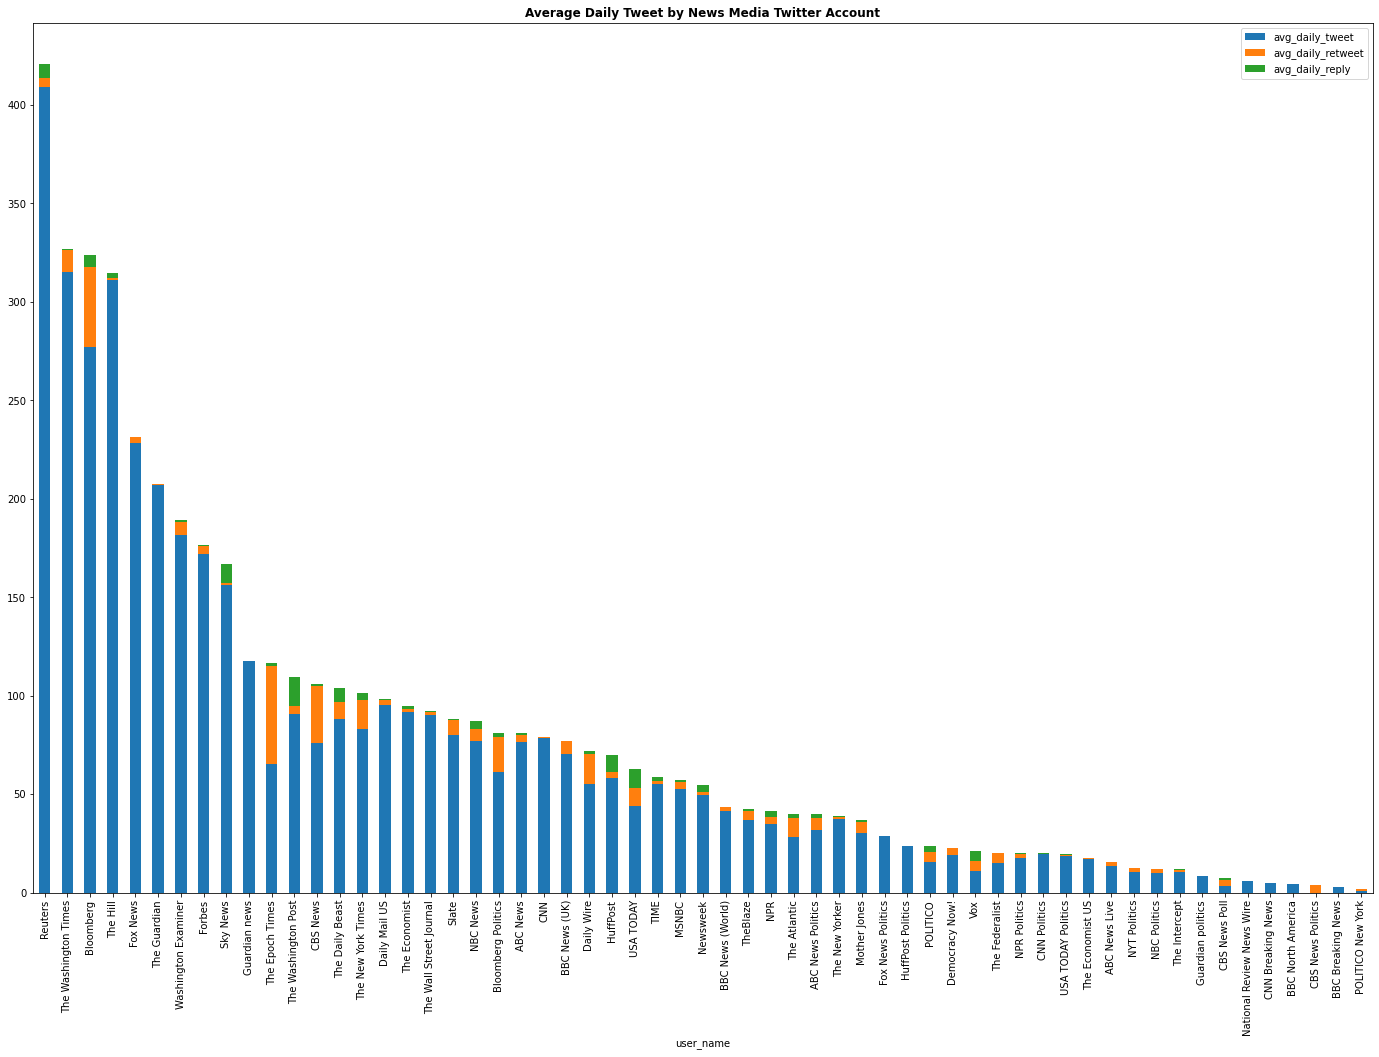

In [44]:
# average daily tweet by user name

ax = combined_analysis_df.sort_values('avg_daily_total_tweet', ascending=False).plot.bar(
    x='user_name', 
    y=['avg_daily_tweet','avg_daily_retweet','avg_daily_reply'], 
    rot=90, 
    stacked=True, 
    figsize=(24,16))

ax.set_title('Average Daily Tweet by News Media Twitter Account',
             fontweight ="bold")

Text(0.5, 1.0, 'Tweet by Political Topics')

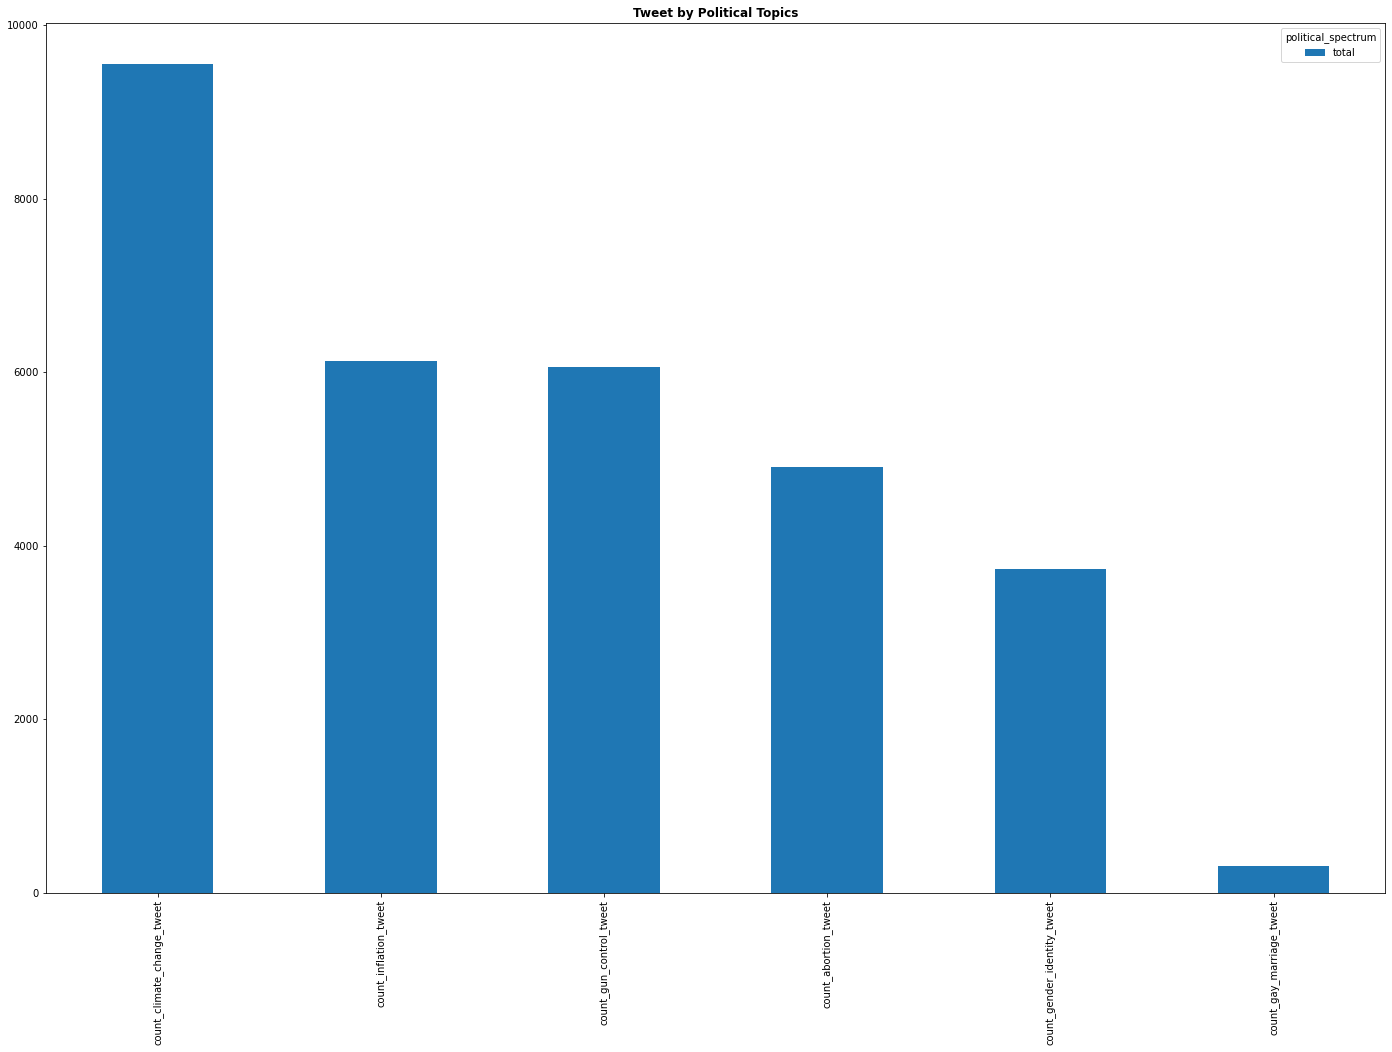

In [69]:
# tweet by topics

ax = combined_analysis_df_piv_2.sort_values('total', ascending=False)[['total']].plot.bar( 
    stacked=True, 
    figsize=(24,16))

ax.set_title('Tweet by Political Topics',
             fontweight ="bold")

Text(0.5, 0.98, 'Average Daily Tweet by News Media Twitter Account and Their Political Spectrum')

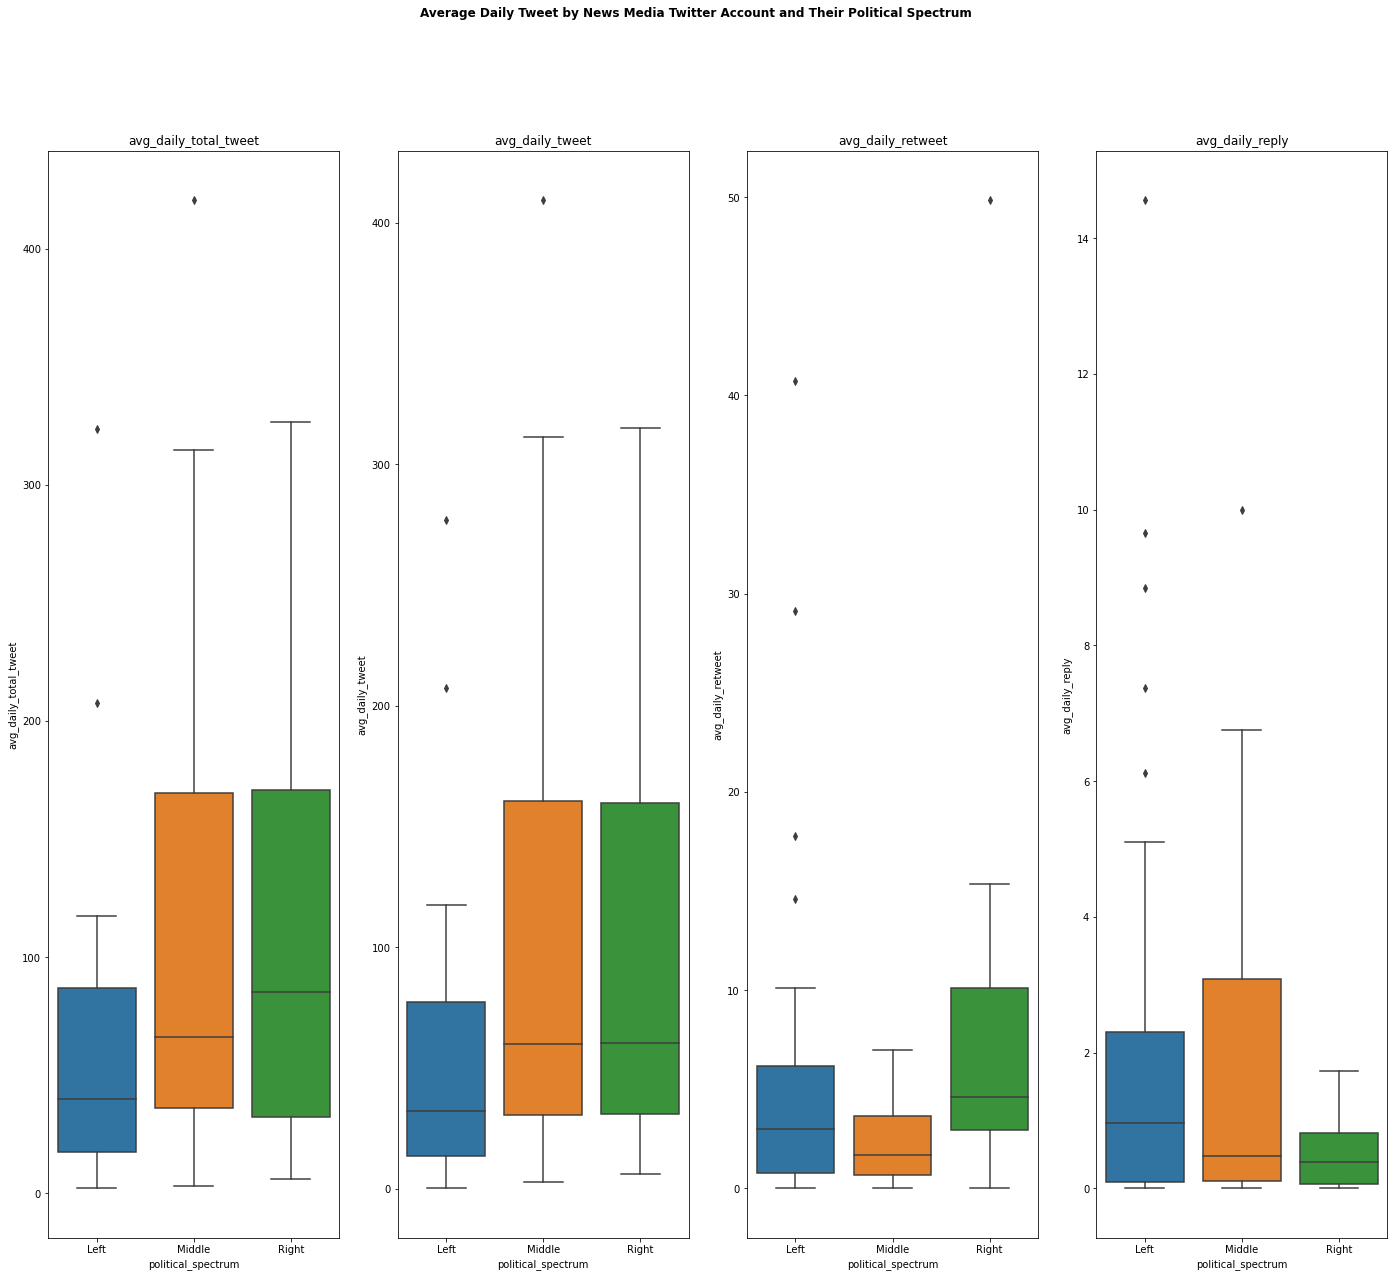

In [70]:
# avg daily tweet per user_name by political_spectrum

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24,20), sharex=True, sharey=False)

sns.boxplot(x="political_spectrum", 
            y="avg_daily_total_tweet", 
            data=combined_analysis_df, 
            orient='v', 
            ax=axes[0]).set_title("avg_daily_total_tweet")

sns.boxplot(x="political_spectrum", 
            y="avg_daily_tweet", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[1]).set_title("avg_daily_tweet")

sns.boxplot(x="political_spectrum", 
            y="avg_daily_retweet", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[2]).set_title("avg_daily_retweet")

sns.boxplot(x="political_spectrum", 
            y="avg_daily_reply", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[3]).set_title("avg_daily_reply")

fig.suptitle("Average Daily Tweet by News Media Twitter Account and Their Political Spectrum",fontweight ="bold")

<AxesSubplot:title={'center':'Average Tweet Sentiment Scores by News Media Twitter Account and Their Political Spectrum'}, xlabel='political_spectrum', ylabel='avg_tweet_scores'>

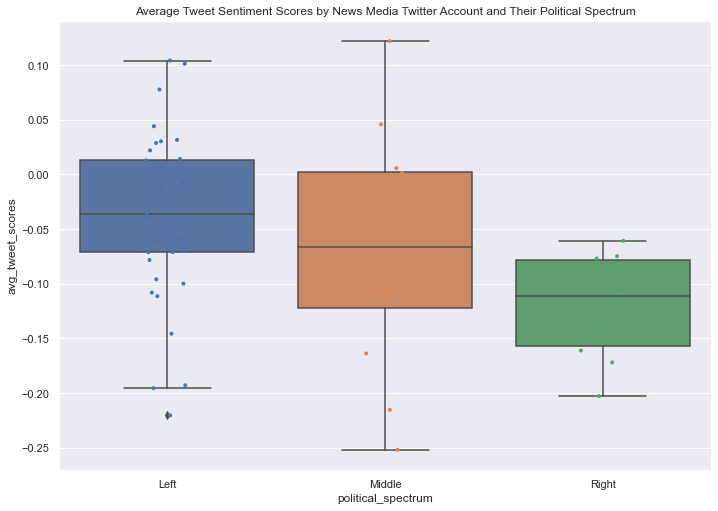

In [71]:
# overall_avg_scores_compound by political_spectrum

sns.set_style("darkgrid")

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.boxplot(x="political_spectrum", y="avg_tweet_scores", data=combined_analysis_df).set(title='Average Tweet Sentiment Scores by News Media Twitter Account and Their Political Spectrum')
sns.stripplot(x="political_spectrum", y="avg_tweet_scores", data=combined_analysis_df,
              size=4, jitter=True, edgecolor="gray")

Text(0.5, 0.98, 'Average Sentiment Scores by Political Topics')

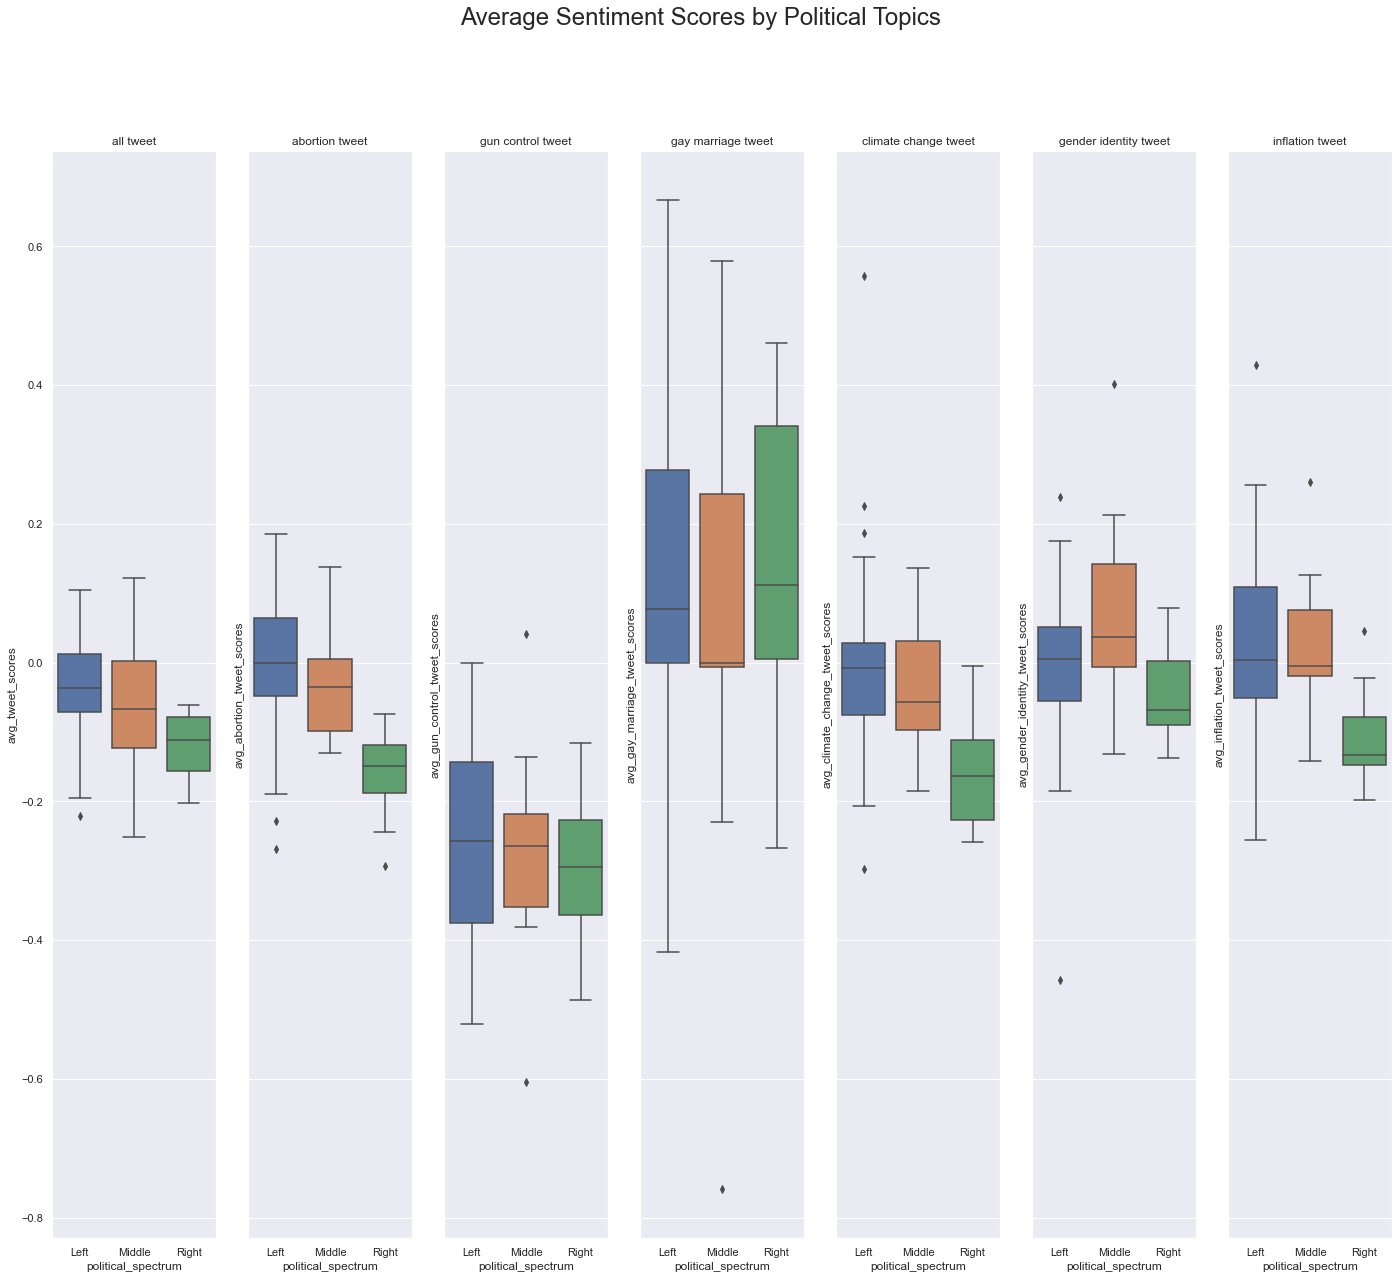

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(24,20), sharex=True, sharey=True)

# plt.setp(ax.get_xticklabels(), fontsize=20)
# ax.tick_params(axis='x', labelsize=20)

sns.boxplot(x="political_spectrum", 
            y="avg_tweet_scores", 
            data=combined_analysis_df, 
            orient='v', 
            ax=axes[0]).set_title("all tweet")

sns.boxplot(x="political_spectrum", 
            y="avg_abortion_tweet_scores", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[1]).set_title("abortion tweet")

sns.boxplot(x="political_spectrum", 
            y="avg_gun_control_tweet_scores", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[2]).set_title("gun control tweet")

sns.boxplot(x="political_spectrum", 
            y="avg_gay_marriage_tweet_scores", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[3]).set_title("gay marriage tweet")

sns.boxplot(x="political_spectrum", 
            y="avg_climate_change_tweet_scores", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[4]).set_title("climate change tweet")

sns.boxplot(x="political_spectrum", 
            y="avg_gender_identity_tweet_scores", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[5]).set_title("gender identity tweet")

sns.boxplot(x="political_spectrum", 
            y="avg_inflation_tweet_scores", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[6]).set_title("inflation tweet")

fig.suptitle('Average Sentiment Scores by Political Topics', fontsize=24)

Text(0.5, 0.98, 'Percentage of Tweet by Political Topics')

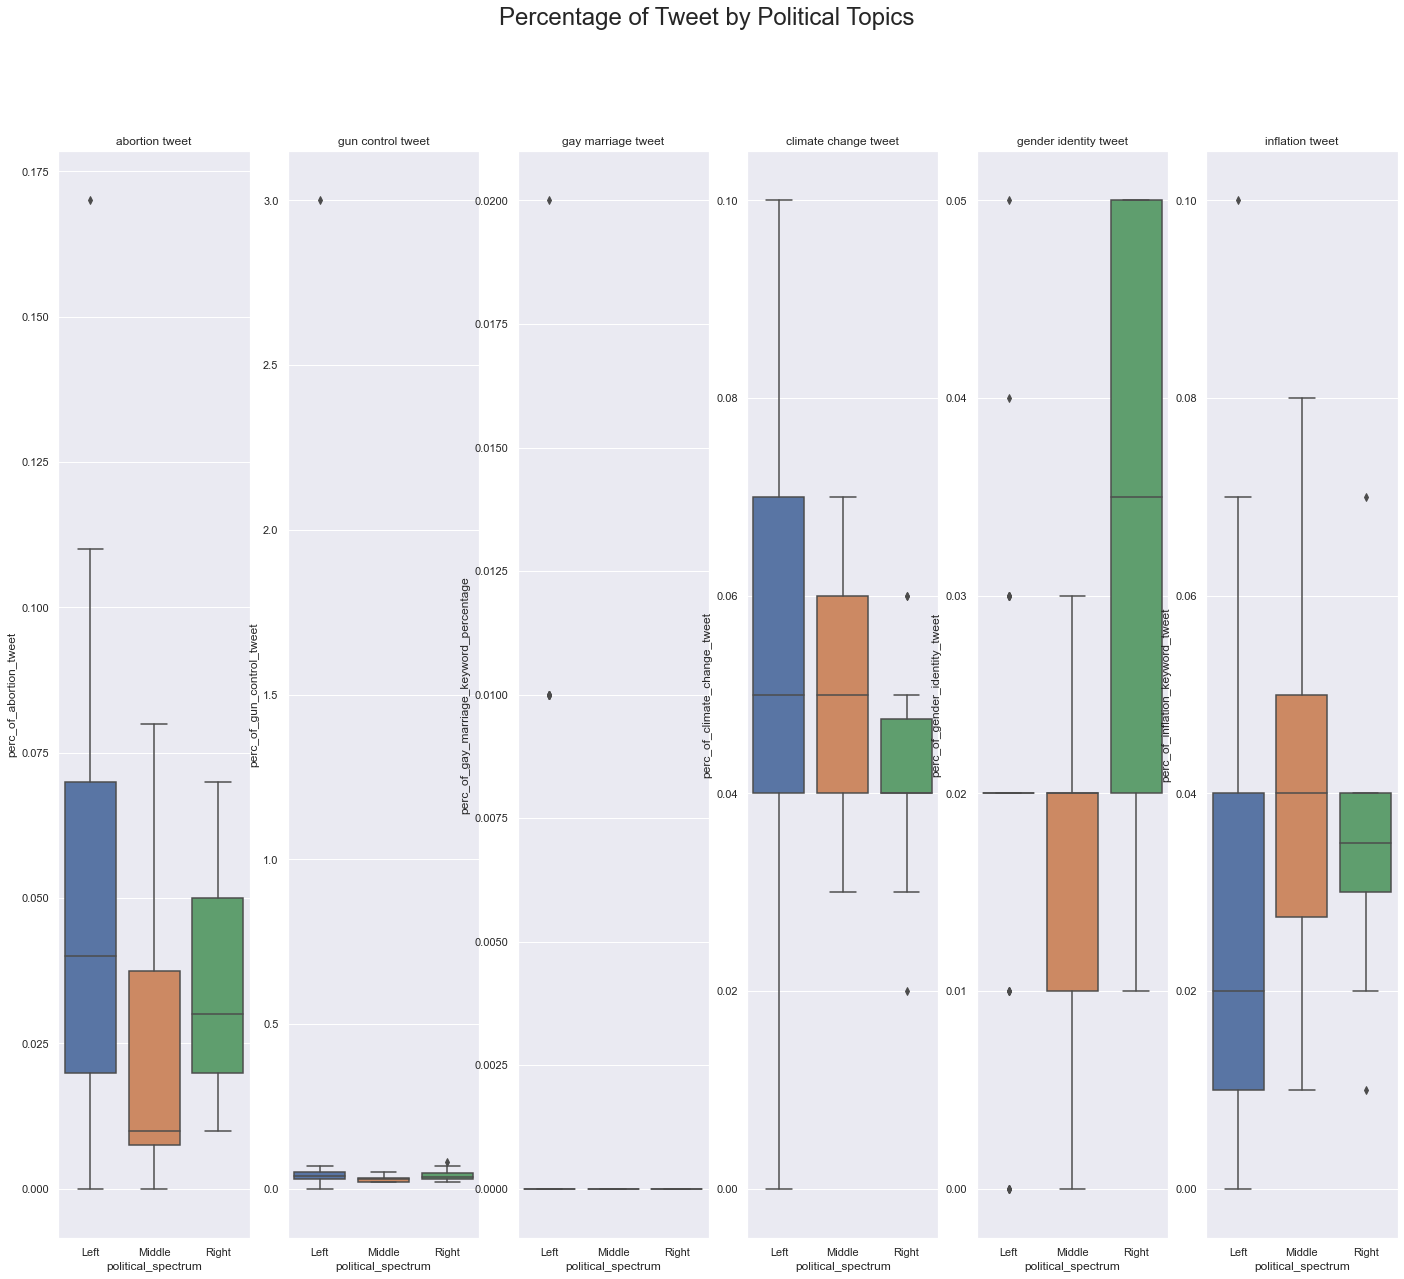

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(24,20))

sns.boxplot(x="political_spectrum", 
            y="perc_of_abortion_tweet", 
            data=combined_analysis_df, 
            orient='v', 
            ax=axes[0]).set_title("abortion tweet")

sns.boxplot(x="political_spectrum", 
            y="perc_of_gun_control_tweet", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[1]).set_title("gun control tweet")

sns.boxplot(x="political_spectrum", 
            y="perc_of_gay_marriage_keyword_percentage", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[2]).set_title("gay marriage tweet")

sns.boxplot(x="political_spectrum", 
            y="perc_of_climate_change_tweet", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[3]).set_title("climate change tweet")

sns.boxplot(x="political_spectrum", 
            y="perc_of_gender_identity_tweet", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[4]).set_title("gender identity tweet")

sns.boxplot(x="political_spectrum", 
            y="perc_of_inflation_keyword_tweet", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[5]).set_title("inflation tweet")

fig.suptitle('Percentage of Tweet by Political Topics', fontsize=24)

Text(0.5, 0.98, 'News Media Twitter Account Followers and Following')

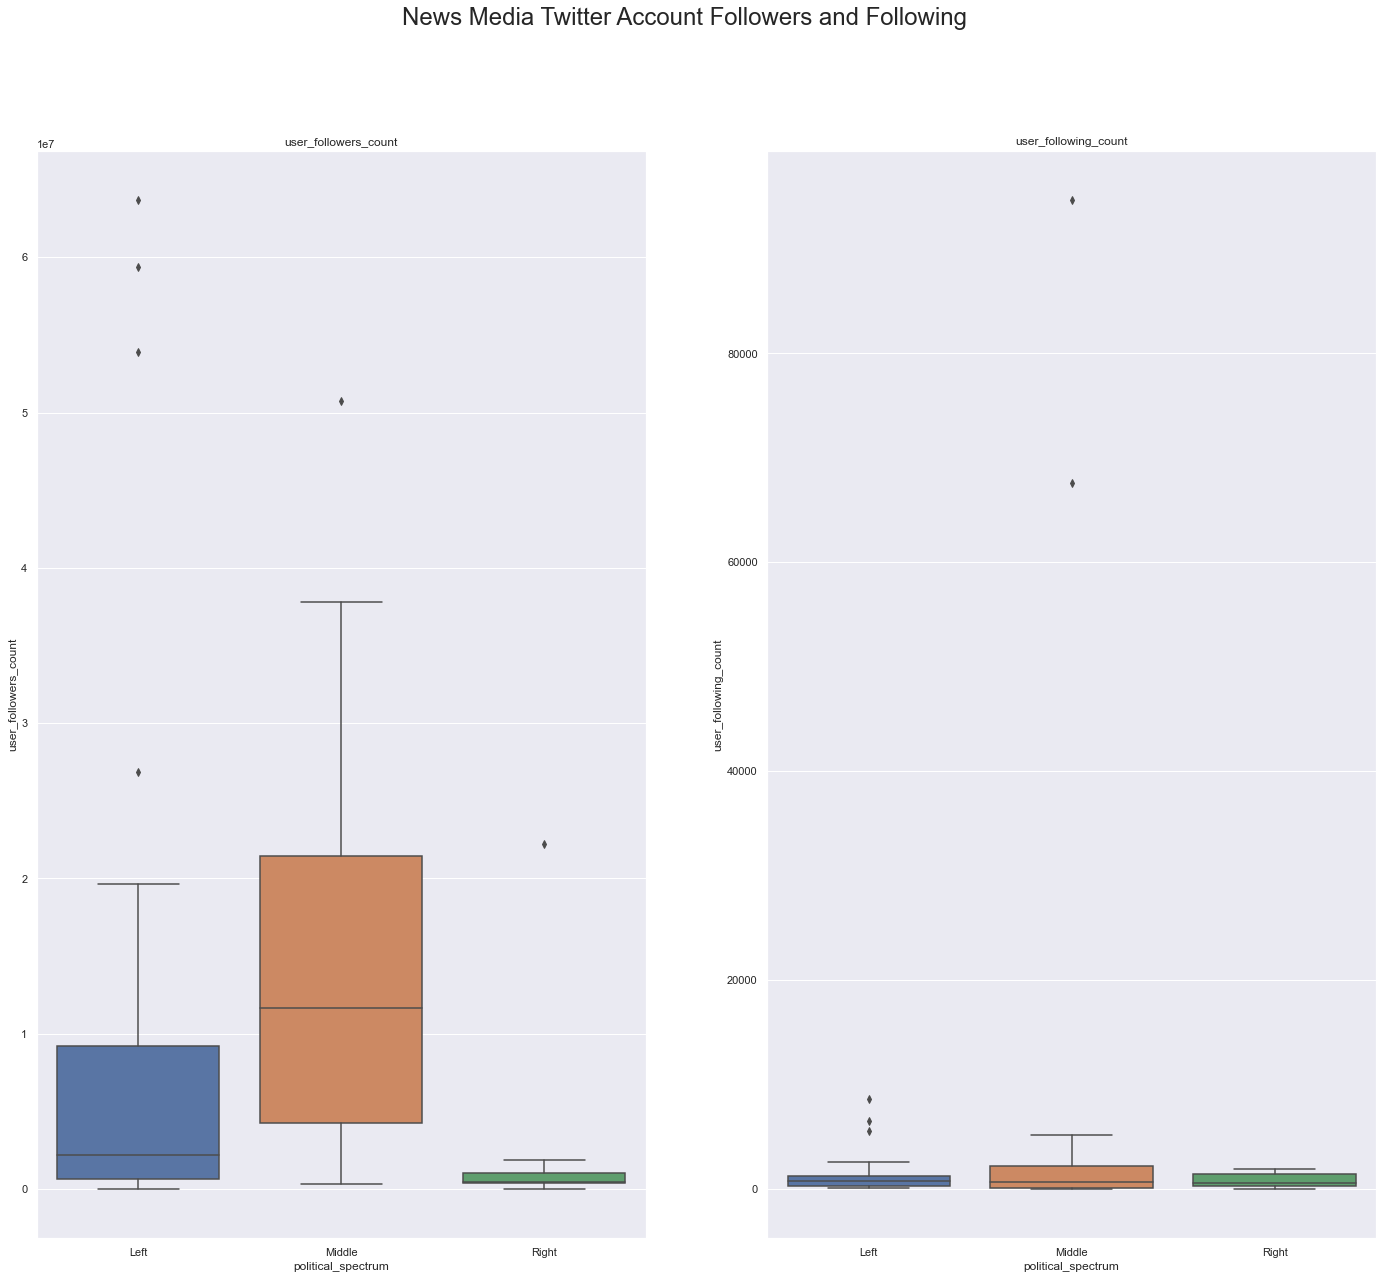

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24,20))

sns.boxplot(x="political_spectrum", 
            y="user_followers_count", 
            data=combined_analysis_df, 
            orient='v', 
            ax=axes[0]).set_title("user_followers_count")

sns.boxplot(x="political_spectrum", 
            y="user_following_count", 
            data=combined_analysis_df,  
            orient='v', 
            ax=axes[1]).set_title("user_following_count")

fig.suptitle('News Media Twitter Account Followers and Following', fontsize=24)

In [75]:
# save the data to a csv file
combined_analysis_df.to_csv (r'/Users/katherina/data_science_tweets_neutrality/combined_analysis_data.csv', index = False, header=True)